In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('vr_data.csv')

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

C:\Users\venka\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
#df.drop(df.loc[df['-0']==0].index, inplace=True)

In [5]:
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

In [6]:
df.head()

,2.2096,2.1123,1.1908,1.3525,6.5403,1.9183,3.3168,6.1588,1.9111,2.4607,...,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29
0,0.43350,2.749000,1.5975,1.130700,4.22360,0.848570,2.03450,4.2217,0.38870,2.2845,...,0,0,1,1,0,1,0,0,1,0
1,0.87538,0.057564,1.2895,0.712780,4.45960,1.605000,0.90355,3.3054,1.14530,3.1375,...,0,0,0,1,0,0,0,1,0,1
2,0.37437,3.169600,2.0344,0.009997,4.33000,0.761020,1.73800,4.2215,4.01470,5.2539,...,0,0,0,1,0,0,0,1,0,1
3,2.73000,3.723000,1.6497,1.658100,3.76020,0.003798,1.67810,3.9504,3.71860,4.5832,...,0,0,1,1,0,1,0,0,0,0
4,4.27220,1.577000,2.1364,1.523200,0.77398,2.664400,3.18910,1.8856,0.35863,3.7652,...,0,0,0,0,0,0,0,0,0,0


In [16]:
y = df.iloc[:,-30:]

In [17]:
y = y.values

In [18]:
y

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 1],
       [0, 1, 0, ..., 1, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 1],
       [1, 1, 0, ..., 0, 0, 0]], dtype=int64)

In [19]:
df_val = df.iloc[:,:-61].values
df_weights = df.iloc[:,30:-31].values

In [20]:
df_val

array([[0.4335  , 2.749   , 1.5975  , ..., 0.61163 , 4.7343  , 0.64428 ],
       [0.87538 , 0.057564, 1.2895  , ..., 3.9341  , 0.57798 , 1.6556  ],
       [0.37437 , 3.1696  , 2.0344  , ..., 2.3437  , 1.1661  , 2.3134  ],
       ...,
       [4.5258  , 5.3044  , 2.51    , ..., 2.4283  , 2.5979  , 3.2565  ],
       [2.5455  , 6.429   , 2.9283  , ..., 1.5326  , 0.25045 , 4.1191  ],
       [3.4728  , 4.8989  , 4.591   , ..., 4.6732  , 0.051054, 4.1926  ]])

In [21]:
df_weights

array([[1.6142e-14, 7.1350e-15, 5.0149e-13, ..., 6.2098e-14, 3.5927e-16,
        2.2079e-14],
       [4.0473e-13, 4.5956e-14, 2.9283e-14, ..., 6.4777e-14, 2.3658e-16,
        1.3259e-15],
       [4.5504e-13, 5.3256e-15, 1.2440e-13, ..., 5.5663e-14, 1.2306e-15,
        1.1575e-14],
       ...,
       [4.9332e-17, 7.4151e-16, 4.6418e-14, ..., 2.7251e-15, 2.5220e-15,
        6.4782e-16],
       [3.8515e-17, 1.2495e-15, 1.5989e-15, ..., 6.4357e-16, 3.6522e-15,
        6.4878e-17],
       [8.3564e-17, 7.6377e-16, 5.5734e-14, ..., 4.9839e-15, 1.5324e-15,
        5.1391e-16]])

## RNN (taking only values and Outputs)

In [22]:
import tensorflow as tf
import pandas as pd
from tensorflow import keras as keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM,GRU,RNN
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.layers import Embedding,Attention
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import TimeDistributed,Bidirectional,RepeatVector, Layer

In [23]:
X_train, X_test, y_train, y_test = train_test_split(df_val, y, test_size=0.20, random_state=42)

X_train = X_train.reshape( 7999, 30,1)
X_test  = X_test.reshape( 2000, 30,1)
y_train = y_train.reshape( 7999,30,1)
y_test = y_test.reshape( 2000,30,1)


In [34]:
model = Sequential()
model.add(LSTM(20, input_shape=(30, 1), return_sequences=True))
model.add(TimeDistributed(Dense(1, activation='sigmoid')))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.compile(loss='mean_absolute_error',optimizer='adam',metrics=['mae'])
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 30, 20)            1760      
_________________________________________________________________
time_distributed_2 (TimeDist (None, 30, 1)             21        
Total params: 1,781
Trainable params: 1,781
Non-trainable params: 0
_________________________________________________________________
None


In [38]:
history = model.fit(X_train, y_train, epochs=100, batch_size=128, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/100
63/63 - 0s - loss: 0.5422 - accuracy: 0.7332
Epoch 2/100
63/63 - 0s - loss: 0.5421 - accuracy: 0.7335
Epoch 3/100
63/63 - 0s - loss: 0.5421 - accuracy: 0.7334
Epoch 4/100
63/63 - 0s - loss: 0.5420 - accuracy: 0.7333
Epoch 5/100
63/63 - 0s - loss: 0.5420 - accuracy: 0.7334
Epoch 6/100
63/63 - 0s - loss: 0.5420 - accuracy: 0.7332
Epoch 7/100
63/63 - 0s - loss: 0.5420 - accuracy: 0.7333
Epoch 8/100
63/63 - 0s - loss: 0.5420 - accuracy: 0.7334
Epoch 9/100
63/63 - 0s - loss: 0.5420 - accuracy: 0.7334
Epoch 10/100
63/63 - 0s - loss: 0.5420 - accuracy: 0.7333
Epoch 11/100
63/63 - 0s - loss: 0.5420 - accuracy: 0.7334
Epoch 12/100
63/63 - 0s - loss: 0.5420 - accuracy: 0.7333
Epoch 13/100
63/63 - 0s - loss: 0.5420 - accuracy: 0.7335
Epoch 14/100
63/63 - 0s - loss: 0.5419 - accuracy: 0.7335
Epoch 15/100
63/63 - 0s - loss: 0.5420 - accuracy: 0.7334
Epoch 16/100
63/63 - 0s - loss: 0.5419 - accuracy: 0.7334
Epoch 17/100
63/63 - 0s - loss: 0.5419 - accuracy: 0.7335
Epoch 18/100
63/63 - 0s

## RNN (taking values with weights per timestamp and Outputs)

In [7]:
df_val = df.iloc[:,:-61]
df_weights = df.iloc[:,30:-31]
C = df['-0'].to_numpy()
X1 = df_val.values
X2 = df_weights.values
y =  df.iloc[:,-30:].values

In [8]:
df4 = pd.concat([df_val, df_weights], axis=1)
df4 = df4[[item for items in zip(df_val.columns, df_weights.columns) for item in items]]

In [10]:
X=df4.values
print(X.shape)
print(y.shape)
X_samp = X.reshape(9999,30,2)
y = y.reshape(9999,30,1)

(9999, 60)
(9999, 30)


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_samp, y, test_size=0.20, random_state=42)

In [20]:
from tensorflow.keras.optimizers import SGD
opt = SGD(lr=0.1)

In [21]:
model = Sequential()
model.add(LSTM(100, input_shape=(30, 2), return_sequences=True))
model.add(TimeDistributed(Dense(1, activation='sigmoid')))
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
#model.compile(loss='mean_absolute_error',optimizer='adam',metrics=['mae'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 100)           41200     
_________________________________________________________________
time_distributed (TimeDistri (None, 30, 1)             101       
Total params: 41,301
Trainable params: 41,301
Non-trainable params: 0
_________________________________________________________________
None


In [22]:
history = model.fit(X_train, y_train, epochs=100, batch_size=128, verbose=2,validation_data=(X_test,y_test))
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/100
53/53 - 1s - loss: 0.6414 - accuracy: 0.6644 - val_loss: 0.6292 - val_accuracy: 0.6635
Epoch 2/100
53/53 - 0s - loss: 0.6188 - accuracy: 0.6663 - val_loss: 0.6121 - val_accuracy: 0.6698
Epoch 3/100
53/53 - 0s - loss: 0.6043 - accuracy: 0.6773 - val_loss: 0.6005 - val_accuracy: 0.6839
Epoch 4/100
53/53 - 0s - loss: 0.5943 - accuracy: 0.6889 - val_loss: 0.5924 - val_accuracy: 0.6937
Epoch 5/100
53/53 - 0s - loss: 0.5873 - accuracy: 0.6964 - val_loss: 0.5868 - val_accuracy: 0.6971
Epoch 6/100
53/53 - 0s - loss: 0.5823 - accuracy: 0.7010 - val_loss: 0.5828 - val_accuracy: 0.7002
Epoch 7/100
53/53 - 0s - loss: 0.5789 - accuracy: 0.7038 - val_loss: 0.5798 - val_accuracy: 0.7022
Epoch 8/100
53/53 - 0s - loss: 0.5764 - accuracy: 0.7055 - val_loss: 0.5777 - val_accuracy: 0.7039
Epoch 9/100
53/53 - 0s - loss: 0.5746 - accuracy: 0.7069 - val_loss: 0.5761 - val_accuracy: 0.7054
Epoch 10/100
53/53 - 0s - loss: 0.5732 - accuracy: 0.7073 - val_loss: 0.5749 - val_accuracy: 0.7061
Epoch 11/

53/53 - 0s - loss: 0.5673 - accuracy: 0.7103 - val_loss: 0.5690 - val_accuracy: 0.7092
Epoch 84/100
53/53 - 0s - loss: 0.5672 - accuracy: 0.7104 - val_loss: 0.5690 - val_accuracy: 0.7083
Epoch 85/100
53/53 - 0s - loss: 0.5672 - accuracy: 0.7103 - val_loss: 0.5693 - val_accuracy: 0.7084
Epoch 86/100
53/53 - 0s - loss: 0.5673 - accuracy: 0.7107 - val_loss: 0.5690 - val_accuracy: 0.7086
Epoch 87/100
53/53 - 0s - loss: 0.5673 - accuracy: 0.7104 - val_loss: 0.5694 - val_accuracy: 0.7086
Epoch 88/100
53/53 - 0s - loss: 0.5672 - accuracy: 0.7104 - val_loss: 0.5692 - val_accuracy: 0.7086
Epoch 89/100
53/53 - 0s - loss: 0.5672 - accuracy: 0.7105 - val_loss: 0.5690 - val_accuracy: 0.7086
Epoch 90/100
53/53 - 0s - loss: 0.5673 - accuracy: 0.7104 - val_loss: 0.5693 - val_accuracy: 0.7087
Epoch 91/100
53/53 - 0s - loss: 0.5672 - accuracy: 0.7105 - val_loss: 0.5690 - val_accuracy: 0.7087
Epoch 92/100
53/53 - 0s - loss: 0.5672 - accuracy: 0.7104 - val_loss: 0.5694 - val_accuracy: 0.7085
Epoch 93/100


## Using Bidirectional LSTM

In [75]:
bmodel = Sequential()
bmodel.add(Bidirectional(LSTM(20, return_sequences=True), input_shape=(30, 2)))
bmodel.add(TimeDistributed(Dense(1, activation='sigmoid')))
bmodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
bmodel.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 30, 40)            3680      
_________________________________________________________________
time_distributed_5 (TimeDist (None, 30, 1)             41        
Total params: 3,721
Trainable params: 3,721
Non-trainable params: 0
_________________________________________________________________


In [76]:
history = bmodel.fit(X_train, y_train, epochs=100, batch_size=128, verbose=2)
# Final evaluation of the model
scores = bmodel.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/100
63/63 - 0s - loss: 0.5903 - accuracy: 0.7152
Epoch 2/100
63/63 - 0s - loss: 0.5600 - accuracy: 0.7197
Epoch 3/100
63/63 - 0s - loss: 0.5479 - accuracy: 0.7304
Epoch 4/100
63/63 - 0s - loss: 0.5450 - accuracy: 0.7316
Epoch 5/100
63/63 - 0s - loss: 0.5438 - accuracy: 0.7325
Epoch 6/100
63/63 - 0s - loss: 0.5431 - accuracy: 0.7328
Epoch 7/100
63/63 - 0s - loss: 0.5426 - accuracy: 0.7331
Epoch 8/100
63/63 - 0s - loss: 0.5426 - accuracy: 0.7328
Epoch 9/100
63/63 - 0s - loss: 0.5426 - accuracy: 0.7330
Epoch 10/100
63/63 - 0s - loss: 0.5421 - accuracy: 0.7331
Epoch 11/100
63/63 - 0s - loss: 0.5423 - accuracy: 0.7328
Epoch 12/100
63/63 - 0s - loss: 0.5421 - accuracy: 0.7332
Epoch 13/100
63/63 - 0s - loss: 0.5419 - accuracy: 0.7335
Epoch 14/100
63/63 - 0s - loss: 0.5421 - accuracy: 0.7330
Epoch 15/100
63/63 - 0s - loss: 0.5417 - accuracy: 0.7336
Epoch 16/100
63/63 - 0s - loss: 0.5418 - accuracy: 0.7335
Epoch 17/100
63/63 - 0s - loss: 0.5419 - accuracy: 0.7332
Epoch 18/100
63/63 - 0s

## Encoder Decoder Model without attention

In [115]:
EDmodel = Sequential()
EDmodel.add(LSTM(200, input_shape=(30,2)))
EDmodel.add(RepeatVector(30))
EDmodel.add(LSTM(200, return_sequences=True))
EDmodel.add(TimeDistributed(Dense(1, activation='sigmoid')))
opt = SGD(lr=0.1)
EDmodel.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [117]:
history = EDmodel.fit(X_train, y_train, epochs=10, batch_size=128, verbose=2,validation_data=(X_test,y_test))
# Final evaluation of the model
scores = bmodel.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/10
63/63 - 1s - loss: 0.5979 - accuracy: 0.7152 - val_loss: 0.5964 - val_accuracy: 0.7183
Epoch 2/10
63/63 - 1s - loss: 0.5979 - accuracy: 0.7152 - val_loss: 0.5952 - val_accuracy: 0.7183
Epoch 3/10
63/63 - 1s - loss: 0.5979 - accuracy: 0.7152 - val_loss: 0.5951 - val_accuracy: 0.7183
Epoch 4/10
63/63 - 1s - loss: 0.5978 - accuracy: 0.7152 - val_loss: 0.5956 - val_accuracy: 0.7183
Epoch 5/10
63/63 - 1s - loss: 0.5978 - accuracy: 0.7152 - val_loss: 0.5951 - val_accuracy: 0.7183
Epoch 6/10
63/63 - 1s - loss: 0.5978 - accuracy: 0.7152 - val_loss: 0.5954 - val_accuracy: 0.7183
Epoch 7/10
63/63 - 1s - loss: 0.5978 - accuracy: 0.7152 - val_loss: 0.5953 - val_accuracy: 0.7183
Epoch 8/10
63/63 - 1s - loss: 0.5977 - accuracy: 0.7152 - val_loss: 0.5950 - val_accuracy: 0.7183
Epoch 9/10
63/63 - 1s - loss: 0.5977 - accuracy: 0.7152 - val_loss: 0.5949 - val_accuracy: 0.7183
Epoch 10/10
63/63 - 1s - loss: 0.5977 - accuracy: 0.7152 - val_loss: 0.5949 - val_accuracy: 0.7183
Accuracy: 73.49%


## Adding Constraint C values to the weight and value pair

In [9]:
C.shape

(9999,)

In [10]:
type(C)

numpy.ndarray

In [11]:
C_repeated = np.repeat(C[None],60,axis=0).transpose()
C_p = pd.DataFrame(C_repeated)

In [12]:
C_p

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,7.884300e-14,7.884300e-14,7.884300e-14,7.884300e-14,7.884300e-14,7.884300e-14,7.884300e-14,7.884300e-14,7.884300e-14,7.884300e-14,...,7.884300e-14,7.884300e-14,7.884300e-14,7.884300e-14,7.884300e-14,7.884300e-14,7.884300e-14,7.884300e-14,7.884300e-14,7.884300e-14
1,7.625400e-14,7.625400e-14,7.625400e-14,7.625400e-14,7.625400e-14,7.625400e-14,7.625400e-14,7.625400e-14,7.625400e-14,7.625400e-14,...,7.625400e-14,7.625400e-14,7.625400e-14,7.625400e-14,7.625400e-14,7.625400e-14,7.625400e-14,7.625400e-14,7.625400e-14,7.625400e-14
2,2.280300e-13,2.280300e-13,2.280300e-13,2.280300e-13,2.280300e-13,2.280300e-13,2.280300e-13,2.280300e-13,2.280300e-13,2.280300e-13,...,2.280300e-13,2.280300e-13,2.280300e-13,2.280300e-13,2.280300e-13,2.280300e-13,2.280300e-13,2.280300e-13,2.280300e-13,2.280300e-13
3,2.305900e-14,2.305900e-14,2.305900e-14,2.305900e-14,2.305900e-14,2.305900e-14,2.305900e-14,2.305900e-14,2.305900e-14,2.305900e-14,...,2.305900e-14,2.305900e-14,2.305900e-14,2.305900e-14,2.305900e-14,2.305900e-14,2.305900e-14,2.305900e-14,2.305900e-14,2.305900e-14
4,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,...,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,8.271300e-14,8.271300e-14,8.271300e-14,8.271300e-14,8.271300e-14,8.271300e-14,8.271300e-14,8.271300e-14,8.271300e-14,8.271300e-14,...,8.271300e-14,8.271300e-14,8.271300e-14,8.271300e-14,8.271300e-14,8.271300e-14,8.271300e-14,8.271300e-14,8.271300e-14,8.271300e-14
9995,4.953600e-14,4.953600e-14,4.953600e-14,4.953600e-14,4.953600e-14,4.953600e-14,4.953600e-14,4.953600e-14,4.953600e-14,4.953600e-14,...,4.953600e-14,4.953600e-14,4.953600e-14,4.953600e-14,4.953600e-14,4.953600e-14,4.953600e-14,4.953600e-14,4.953600e-14,4.953600e-14
9996,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,...,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00
9997,1.413600e-14,1.413600e-14,1.413600e-14,1.413600e-14,1.413600e-14,1.413600e-14,1.413600e-14,1.413600e-14,1.413600e-14,1.413600e-14,...,1.413600e-14,1.413600e-14,1.413600e-14,1.413600e-14,1.413600e-14,1.413600e-14,1.413600e-14,1.413600e-14,1.413600e-14,1.413600e-14


In [13]:
df4

,2.2096,1.8448e-13,2.1123,7.6782e-15,1.1908,5.8468e-13,1.3525,2.1994e-09,6.5403,3.1986e-15,...,5.6924,7.8243e-16,0.23376,2.2805e-13,2.3531,2.3438e-13,1.2728,4.8311e-17,1.3592,1.4615e-14
0,0.43350,1.614200e-14,2.749000,7.135000e-15,1.5975,5.014900e-13,1.130700,9.363100e-10,4.22360,1.002200e-15,...,1.566200,3.111600e-16,1.8316,1.517700e-12,0.61163,6.209800e-14,4.734300,3.592700e-16,0.64428,2.207900e-14
1,0.87538,4.047300e-13,0.057564,4.595600e-14,1.2895,2.928300e-14,0.712780,1.509900e-10,4.45960,8.762100e-18,...,5.057800,2.367200e-15,2.2133,3.305400e-14,3.93410,6.477700e-14,0.577980,2.365800e-16,1.65560,1.325900e-15
2,0.37437,4.550400e-13,3.169600,5.325600e-15,2.0344,1.244000e-13,0.009997,1.883600e-10,4.33000,4.256400e-15,...,2.681500,1.292800e-15,2.0676,7.036000e-13,2.34370,5.566300e-14,1.166100,1.230600e-15,2.31340,1.157500e-14
3,2.73000,1.109000e-13,3.723000,3.663600e-15,1.6497,7.213200e-13,1.658100,5.806300e-09,3.76020,2.692500e-15,...,2.667700,2.290200e-15,2.3929,5.730900e-13,1.51120,1.154100e-13,1.313300,2.452800e-16,0.43596,2.961100e-15
4,4.27220,1.647500e-13,1.577000,7.184100e-15,2.1364,2.119100e-13,1.523200,3.764400e-10,0.77398,5.382400e-15,...,4.192900,4.852900e-17,2.8858,1.057100e-13,2.20000,3.594200e-14,3.609000,1.051000e-16,1.65350,8.197300e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,3.29060,2.276700e-17,2.420100,1.458300e-16,3.9382,4.671000e-14,4.754600,1.863700e-14,1.54960,1.126100e-14,...,0.240640,8.221500e-16,3.8861,1.699500e-15,2.92120,7.662700e-15,3.103400,2.361700e-15,4.22960,3.999000e-16
9995,1.63530,1.092800e-16,1.508400,6.562700e-17,1.9670,1.797900e-13,3.687000,2.459300e-14,3.33530,7.235500e-15,...,0.031734,5.845600e-17,1.1460,5.532100e-15,0.15122,2.338800e-15,5.348700,2.932200e-15,2.99670,3.396700e-17
9996,4.52580,4.933200e-17,5.304400,7.415100e-16,2.5100,4.641800e-14,2.788200,4.984600e-14,1.90430,3.681500e-14,...,0.670030,1.811600e-16,3.4048,4.515400e-16,2.42830,2.725100e-15,2.597900,2.522000e-15,3.25650,6.478200e-16
9997,2.54550,3.851500e-17,6.429000,1.249500e-15,2.9283,1.598900e-15,2.807300,5.087400e-15,2.93440,1.699100e-14,...,0.625550,2.986500e-16,4.0887,6.065400e-16,1.53260,6.435700e-16,0.250450,3.652200e-15,4.11910,6.487800e-17


In [14]:
df5 = pd.concat([df4,C_p ], axis=1)
df5 = df5[[item for (items) in zip(df4.columns, C_p.columns) for item in (items)]]

In [15]:
df5

,2.2096,0,1.8448e-13,1,2.1123,2,7.6782e-15,3,1.1908,4,...,2.3438e-13,55,1.2728,56,4.8311e-17,57,1.3592,58,1.4615e-14,59
0,0.43350,7.884300e-14,1.614200e-14,7.884300e-14,2.749000,7.884300e-14,7.135000e-15,7.884300e-14,1.5975,7.884300e-14,...,6.209800e-14,7.884300e-14,4.734300,7.884300e-14,3.592700e-16,7.884300e-14,0.64428,7.884300e-14,2.207900e-14,7.884300e-14
1,0.87538,7.625400e-14,4.047300e-13,7.625400e-14,0.057564,7.625400e-14,4.595600e-14,7.625400e-14,1.2895,7.625400e-14,...,6.477700e-14,7.625400e-14,0.577980,7.625400e-14,2.365800e-16,7.625400e-14,1.65560,7.625400e-14,1.325900e-15,7.625400e-14
2,0.37437,2.280300e-13,4.550400e-13,2.280300e-13,3.169600,2.280300e-13,5.325600e-15,2.280300e-13,2.0344,2.280300e-13,...,5.566300e-14,2.280300e-13,1.166100,2.280300e-13,1.230600e-15,2.280300e-13,2.31340,2.280300e-13,1.157500e-14,2.280300e-13
3,2.73000,2.305900e-14,1.109000e-13,2.305900e-14,3.723000,2.305900e-14,3.663600e-15,2.305900e-14,1.6497,2.305900e-14,...,1.154100e-13,2.305900e-14,1.313300,2.305900e-14,2.452800e-16,2.305900e-14,0.43596,2.305900e-14,2.961100e-15,2.305900e-14
4,4.27220,-0.000000e+00,1.647500e-13,-0.000000e+00,1.577000,-0.000000e+00,7.184100e-15,-0.000000e+00,2.1364,-0.000000e+00,...,3.594200e-14,-0.000000e+00,3.609000,-0.000000e+00,1.051000e-16,-0.000000e+00,1.65350,-0.000000e+00,8.197300e-15,-0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,3.29060,8.271300e-14,2.276700e-17,8.271300e-14,2.420100,8.271300e-14,1.458300e-16,8.271300e-14,3.9382,8.271300e-14,...,7.662700e-15,8.271300e-14,3.103400,8.271300e-14,2.361700e-15,8.271300e-14,4.22960,8.271300e-14,3.999000e-16,8.271300e-14
9995,1.63530,4.953600e-14,1.092800e-16,4.953600e-14,1.508400,4.953600e-14,6.562700e-17,4.953600e-14,1.9670,4.953600e-14,...,2.338800e-15,4.953600e-14,5.348700,4.953600e-14,2.932200e-15,4.953600e-14,2.99670,4.953600e-14,3.396700e-17,4.953600e-14
9996,4.52580,-0.000000e+00,4.933200e-17,-0.000000e+00,5.304400,-0.000000e+00,7.415100e-16,-0.000000e+00,2.5100,-0.000000e+00,...,2.725100e-15,-0.000000e+00,2.597900,-0.000000e+00,2.522000e-15,-0.000000e+00,3.25650,-0.000000e+00,6.478200e-16,-0.000000e+00
9997,2.54550,1.413600e-14,3.851500e-17,1.413600e-14,6.429000,1.413600e-14,1.249500e-15,1.413600e-14,2.9283,1.413600e-14,...,6.435700e-16,1.413600e-14,0.250450,1.413600e-14,3.652200e-15,1.413600e-14,4.11910,1.413600e-14,6.487800e-17,1.413600e-14


In [16]:
#del df5

In [17]:
for i in list(df5):
    if float(i)%2 == 0:
        del df5[i]

In [18]:
df5

,2.2096,1.8448e-13,1,2.1123,7.6782e-15,3,1.1908,5.8468e-13,5,1.3525,...,53,2.3531,2.3438e-13,55,1.2728,4.8311e-17,57,1.3592,1.4615e-14,59
0,0.43350,1.614200e-14,7.884300e-14,2.749000,7.135000e-15,7.884300e-14,1.5975,5.014900e-13,7.884300e-14,1.130700,...,7.884300e-14,0.61163,6.209800e-14,7.884300e-14,4.734300,3.592700e-16,7.884300e-14,0.64428,2.207900e-14,7.884300e-14
1,0.87538,4.047300e-13,7.625400e-14,0.057564,4.595600e-14,7.625400e-14,1.2895,2.928300e-14,7.625400e-14,0.712780,...,7.625400e-14,3.93410,6.477700e-14,7.625400e-14,0.577980,2.365800e-16,7.625400e-14,1.65560,1.325900e-15,7.625400e-14
2,0.37437,4.550400e-13,2.280300e-13,3.169600,5.325600e-15,2.280300e-13,2.0344,1.244000e-13,2.280300e-13,0.009997,...,2.280300e-13,2.34370,5.566300e-14,2.280300e-13,1.166100,1.230600e-15,2.280300e-13,2.31340,1.157500e-14,2.280300e-13
3,2.73000,1.109000e-13,2.305900e-14,3.723000,3.663600e-15,2.305900e-14,1.6497,7.213200e-13,2.305900e-14,1.658100,...,2.305900e-14,1.51120,1.154100e-13,2.305900e-14,1.313300,2.452800e-16,2.305900e-14,0.43596,2.961100e-15,2.305900e-14
4,4.27220,1.647500e-13,-0.000000e+00,1.577000,7.184100e-15,-0.000000e+00,2.1364,2.119100e-13,-0.000000e+00,1.523200,...,-0.000000e+00,2.20000,3.594200e-14,-0.000000e+00,3.609000,1.051000e-16,-0.000000e+00,1.65350,8.197300e-15,-0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,3.29060,2.276700e-17,8.271300e-14,2.420100,1.458300e-16,8.271300e-14,3.9382,4.671000e-14,8.271300e-14,4.754600,...,8.271300e-14,2.92120,7.662700e-15,8.271300e-14,3.103400,2.361700e-15,8.271300e-14,4.22960,3.999000e-16,8.271300e-14
9995,1.63530,1.092800e-16,4.953600e-14,1.508400,6.562700e-17,4.953600e-14,1.9670,1.797900e-13,4.953600e-14,3.687000,...,4.953600e-14,0.15122,2.338800e-15,4.953600e-14,5.348700,2.932200e-15,4.953600e-14,2.99670,3.396700e-17,4.953600e-14
9996,4.52580,4.933200e-17,-0.000000e+00,5.304400,7.415100e-16,-0.000000e+00,2.5100,4.641800e-14,-0.000000e+00,2.788200,...,-0.000000e+00,2.42830,2.725100e-15,-0.000000e+00,2.597900,2.522000e-15,-0.000000e+00,3.25650,6.478200e-16,-0.000000e+00
9997,2.54550,3.851500e-17,1.413600e-14,6.429000,1.249500e-15,1.413600e-14,2.9283,1.598900e-15,1.413600e-14,2.807300,...,1.413600e-14,1.53260,6.435700e-16,1.413600e-14,0.250450,3.652200e-15,1.413600e-14,4.11910,6.487800e-17,1.413600e-14


In [19]:
XC = df5.values
XC_samp = XC.reshape(9999,30,3)
y = y.reshape(9999,30,1)

In [20]:
XC_samp

array([[[ 4.3350e-01,  1.6142e-14,  7.8843e-14],
        [ 2.7490e+00,  7.1350e-15,  7.8843e-14],
        [ 1.5975e+00,  5.0149e-13,  7.8843e-14],
        ...,
        [ 6.1163e-01,  6.2098e-14,  7.8843e-14],
        [ 4.7343e+00,  3.5927e-16,  7.8843e-14],
        [ 6.4428e-01,  2.2079e-14,  7.8843e-14]],

       [[ 8.7538e-01,  4.0473e-13,  7.6254e-14],
        [ 5.7564e-02,  4.5956e-14,  7.6254e-14],
        [ 1.2895e+00,  2.9283e-14,  7.6254e-14],
        ...,
        [ 3.9341e+00,  6.4777e-14,  7.6254e-14],
        [ 5.7798e-01,  2.3658e-16,  7.6254e-14],
        [ 1.6556e+00,  1.3259e-15,  7.6254e-14]],

       [[ 3.7437e-01,  4.5504e-13,  2.2803e-13],
        [ 3.1696e+00,  5.3256e-15,  2.2803e-13],
        [ 2.0344e+00,  1.2440e-13,  2.2803e-13],
        ...,
        [ 2.3437e+00,  5.5663e-14,  2.2803e-13],
        [ 1.1661e+00,  1.2306e-15,  2.2803e-13],
        [ 2.3134e+00,  1.1575e-14,  2.2803e-13]],

       ...,

       [[ 4.5258e+00,  4.9332e-17, -0.0000e+00],
        [ 5

In [23]:
X_train, X_test, y_train, y_test = train_test_split(XC_samp, y, test_size=0.20, random_state=42)

### Basic RNN

In [24]:
from tensorflow.keras.optimizers import SGD
opt = SGD(lr=0.1)
Cmodel = Sequential()
Cmodel.add(LSTM(200, input_shape=(30, 3), return_sequences=True))
Cmodel.add(Dense(128,activation = 'relu'))
Cmodel.add(TimeDistributed(Dense(1, activation='sigmoid')))

Cmodel.compile(loss='binary_crossentropy', optimizer=opt, metrics=[tf.keras.metrics.binary_accuracy])
#model.compile(loss='mean_absolute_error',optimizer='adam',metrics=['mae'])
print(Cmodel.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 200)           163200    
_________________________________________________________________
dense (Dense)                (None, 30, 128)           25728     
_________________________________________________________________
time_distributed (TimeDistri (None, 30, 1)             129       
Total params: 189,057
Trainable params: 189,057
Non-trainable params: 0
_________________________________________________________________
None


In [25]:
history = Cmodel.fit(X_train, y_train, epochs=100, verbose=1,validation_data=(X_test,y_test))
# Final evaluation of the model
scores = Cmodel.evaluate(X_test, y_test, verbose=2)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/100
250/250 [==============================] - 3s 10ms/step - loss: 0.5956 - binary_accuracy: 0.7134 - val_loss: 0.5854 - val_binary_accuracy: 0.7183
Epoch 2/100
250/250 [==============================] - 2s 8ms/step - loss: 0.5828 - binary_accuracy: 0.7152 - val_loss: 0.5730 - val_binary_accuracy: 0.7183
Epoch 3/100
250/250 [==============================] - 2s 8ms/step - loss: 0.5689 - binary_accuracy: 0.7167 - val_loss: 0.5593 - val_binary_accuracy: 0.7205
Epoch 4/100
250/250 [==============================] - 2s 8ms/step - loss: 0.5576 - binary_accuracy: 0.7228 - val_loss: 0.5504 - val_binary_accuracy: 0.7271
Epoch 5/100
250/250 [==============================] - 2s 8ms/step - loss: 0.5508 - binary_accuracy: 0.7270 - val_loss: 0.5458 - val_binary_accuracy: 0.7304
Epoch 6/100
250/250 [==============================] - 2s 8ms/step - loss: 0.5474 - binary_accuracy: 0.7292 - val_loss: 0.5429 - val_binary_accuracy: 0.7335
Epoch 7/100
250/250 [==============================] - 2s

Epoch 53/100
250/250 [==============================] - 2s 8ms/step - loss: 0.5434 - binary_accuracy: 0.7327 - val_loss: 0.5402 - val_binary_accuracy: 0.7347
Epoch 54/100
250/250 [==============================] - 2s 7ms/step - loss: 0.5431 - binary_accuracy: 0.7328 - val_loss: 0.5468 - val_binary_accuracy: 0.7301
Epoch 55/100
250/250 [==============================] - 2s 8ms/step - loss: 0.5432 - binary_accuracy: 0.7326 - val_loss: 0.5427 - val_binary_accuracy: 0.7335
Epoch 56/100
250/250 [==============================] - 2s 8ms/step - loss: 0.5434 - binary_accuracy: 0.7327 - val_loss: 0.5408 - val_binary_accuracy: 0.7346
Epoch 57/100
250/250 [==============================] - 2s 8ms/step - loss: 0.5432 - binary_accuracy: 0.7324 - val_loss: 0.5402 - val_binary_accuracy: 0.7346
Epoch 58/100
250/250 [==============================] - 2s 8ms/step - loss: 0.5436 - binary_accuracy: 0.7320 - val_loss: 0.5400 - val_binary_accuracy: 0.7351
Epoch 59/100
250/250 [==============================

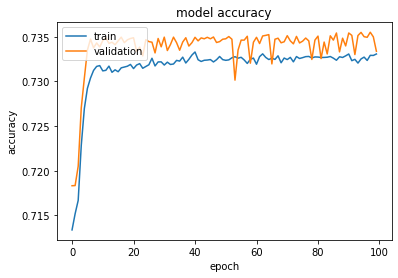

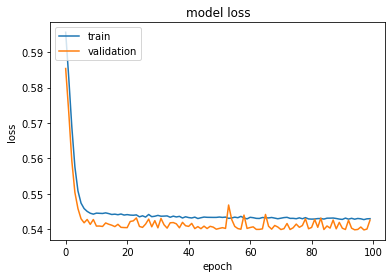

In [26]:
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Bidirectional LSTM

In [292]:
bCmodel = Sequential()
bCmodel.add(Bidirectional(LSTM(200, return_sequences=True), input_shape=(30, 3)))
bCmodel.add(TimeDistributed(Dense(1, activation='sigmoid')))
bCmodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
bCmodel.summary()

Model: "sequential_68"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_4 (Bidirection (None, 30, 400)           326400    
_________________________________________________________________
time_distributed_31 (TimeDis (None, 30, 1)             401       
Total params: 326,801
Trainable params: 326,801
Non-trainable params: 0
_________________________________________________________________


In [293]:
history = bCmodel.fit(X_train, y_train, epochs=100, batch_size=128, verbose=2,validation_data=(X_test,y_test))
# Final evaluation of the model
scores = bCmodel.evaluate(X_test, y_test, verbose=2)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/100
63/63 - 2s - loss: 0.5706 - accuracy: 0.7211 - val_loss: 0.5413 - val_accuracy: 0.7349
Epoch 2/100
63/63 - 1s - loss: 0.5436 - accuracy: 0.7324 - val_loss: 0.5424 - val_accuracy: 0.7352
Epoch 3/100
63/63 - 1s - loss: 0.5435 - accuracy: 0.7321 - val_loss: 0.5405 - val_accuracy: 0.7357
Epoch 4/100
63/63 - 1s - loss: 0.5424 - accuracy: 0.7330 - val_loss: 0.5401 - val_accuracy: 0.7351
Epoch 5/100
63/63 - 1s - loss: 0.5427 - accuracy: 0.7329 - val_loss: 0.5413 - val_accuracy: 0.7350
Epoch 6/100
63/63 - 1s - loss: 0.5426 - accuracy: 0.7324 - val_loss: 0.5412 - val_accuracy: 0.7346
Epoch 7/100
63/63 - 1s - loss: 0.5422 - accuracy: 0.7330 - val_loss: 0.5421 - val_accuracy: 0.7348
Epoch 8/100
63/63 - 1s - loss: 0.5422 - accuracy: 0.7335 - val_loss: 0.5400 - val_accuracy: 0.7351
Epoch 9/100
63/63 - 1s - loss: 0.5426 - accuracy: 0.7330 - val_loss: 0.5393 - val_accuracy: 0.7351
Epoch 10/100
63/63 - 1s - loss: 0.5422 - accuracy: 0.7333 - val_loss: 0.5395 - val_accuracy: 0.7355
Epoch 11/

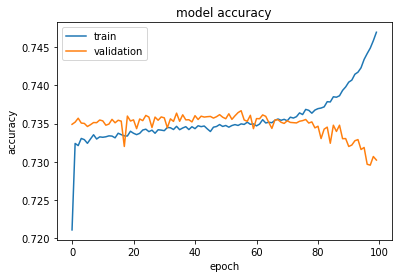

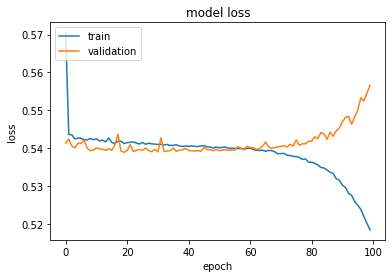

In [295]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Encoder Decoder Model

In [61]:
EDCmodel = Sequential()
EDCmodel.add(LSTM(200, input_shape=(30,3)))
EDCmodel.add(RepeatVector(30))
EDCmodel.add(LSTM(200, return_sequences=True))
EDCmodel.add(TimeDistributed(Dense(1, activation='sigmoid')))
opt = SGD(lr=0.01)
EDCmodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [62]:
history = EDCmodel.fit(X_train, y_train, epochs=10, batch_size=128, verbose=2,validation_data=(X_test,y_test))
# Final evaluation of the model
scores = EDCmodel.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/10
63/63 - 2s - loss: 0.6031 - accuracy: 0.7152 - val_loss: 0.5962 - val_accuracy: 0.7183
Epoch 2/10
63/63 - 1s - loss: 0.5983 - accuracy: 0.7152 - val_loss: 0.5949 - val_accuracy: 0.7183
Epoch 3/10
63/63 - 1s - loss: 0.5978 - accuracy: 0.7152 - val_loss: 0.5951 - val_accuracy: 0.7183
Epoch 4/10
63/63 - 1s - loss: 0.5977 - accuracy: 0.7152 - val_loss: 0.5954 - val_accuracy: 0.7183
Epoch 5/10
63/63 - 1s - loss: 0.5976 - accuracy: 0.7152 - val_loss: 0.5945 - val_accuracy: 0.7183
Epoch 6/10
63/63 - 1s - loss: 0.5979 - accuracy: 0.7152 - val_loss: 0.5946 - val_accuracy: 0.7183
Epoch 7/10
63/63 - 1s - loss: 0.5975 - accuracy: 0.7152 - val_loss: 0.5947 - val_accuracy: 0.7183
Epoch 8/10
63/63 - 1s - loss: 0.5977 - accuracy: 0.7152 - val_loss: 0.5961 - val_accuracy: 0.7183
Epoch 9/10
63/63 - 1s - loss: 0.5975 - accuracy: 0.7152 - val_loss: 0.5944 - val_accuracy: 0.7183
Epoch 10/10
63/63 - 1s - loss: 0.5972 - accuracy: 0.7152 - val_loss: 0.5944 - val_accuracy: 0.7183
Accuracy: 71.83%


# Making Custom Function for checking

In [28]:
df_weights_val = df_weights.values

In [29]:
df_weights_val.shape

(9999, 30)

In [31]:
y_val = y.reshape(9999,30)

In [32]:
y_val

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 1],
       [0, 1, 0, ..., 1, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 1],
       [1, 1, 0, ..., 0, 0, 0]], dtype=int64)

In [37]:
C.shape

(9999,)

In [44]:
XW_output = np.multiply(df_weights_val,y_val)

In [45]:
XW_output

array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 3.5927e-16,
        0.0000e+00],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 6.4777e-14, 0.0000e+00,
        1.3259e-15],
       [0.0000e+00, 5.3256e-15, 0.0000e+00, ..., 5.5663e-14, 0.0000e+00,
        1.1575e-14],
       ...,
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [3.8515e-17, 1.2495e-15, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        6.4878e-17],
       [8.3564e-17, 7.6377e-16, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]])

In [60]:
count_tru = 0
count_false= 0
for i,j in zip(XW_output,C):
    if (sum(i)) <= j:
        count_tru = count_tru+1
    else:
        count_false = count_false+1

In [61]:
print(count_tru)
print(count_false)

9999
0


In [78]:
y_pred = Cmodel.predict(X_test)

In [79]:
y_pred = tf.keras.backend.round(y_pred)

In [ ]:
y_pred

In [86]:
sum(y_pred[1])

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([2.], dtype=float32)>

In [87]:
sum(y_test[1])

array([10], dtype=int64)